In [309]:
using StatsBase
using Statistics
using CSV
using Plots
using StatsPlots
using TikzPictures
using DSP
using Measurements

#pgfplots()
#tikzCommand("lualatex") # The default. Dynamically allocates more memory, unlike PDFLaTeX
gr()

Plots.GRBackend()

In [310]:
rtdata = CSV.File("./data/Tek004.csv"; header=false)
rtweights = FrequencyWeights(rtdata.Column2)
rt = mean(rtdata.Column1, rtweights)
rtσ = std(rtdata.Column1, rtweights, corrected=true)

1.1492676743389036e-9

In [311]:
rtσ /= 4 # For a 1 Vpp square wave edge
rt /= 4

1.290866506382043e-7

The steps in the error plots are in single-digit intervals, so the results should taken with a grain of salt

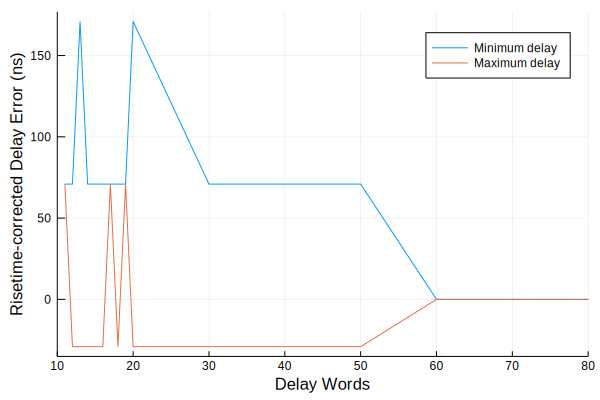

In [312]:
dlimit=35;
ddata = CSV.File("./delay_linearity.csv"; skipto=2, limit=dlimit, header=[:min, :max, :swords, :na, :clock, :signal, :rt]);
rtcorrection = vcat(repeat([rt], 13), zeros(dlimit-13));
minerr = 1e-3.*ddata.min .- (ddata.swords .* 20e-6) .+ 20e-6 - rtcorrection;
maxerr = 1e-3.*ddata.max .- (ddata.swords .* 20e-6) - rtcorrection;
plot(ddata.swords, [minerr, maxerr] ./ 1e-9,
    xlim=(10,80), xlabel="Delay Words", ylabel="Risetime-corrected Delay Error (ns)",
    label=["Minimum delay", "Maximum delay"])

In [313]:
pt = mean(map(mean, [minerr[1:13], maxerr[1:13]])) ./ 1e-9 # *Roughly estimated* propagation delay (ns)

40.14411859255405

In [314]:
meandata = CSV.File("./data/diffmean2.csv"; header=false);
meanweights = FrequencyWeights(meandata.Column2);
diffμ = mean(meandata.Column1, meanweights);
diffμσ = std(meandata.Column1, meanweights, corrected=true);
(diffμ ± diffμσ) * 1e3 # mV

-1.023 ± 0.095

In [315]:
acrmsdata = CSV.File("./data/diffacrms2.csv"; header=false);
acrmsweights = FrequencyWeights(acrmsdata.Column2);
diffσ = mean(acrmsdata.Column1, acrmsweights);
diffσσ = std(acrmsdata.Column1, acrmsweights, corrected=true);
(diffσ ± diffσσ) * 1e3 # mV (RMS)

1.035 ± 0.058

In [316]:
diff500 = CSV.File("./data/500HzDiff100MHz.csv", skipto=10, header=[:t, :v]) # Oops: is actually 50 Hz

CSV.File("./data/500HzDiff100MHz.csv"):
Size: 1250000 x 2
Tables.Schema:
 :t  Float64
 :v  Float64

In [318]:
#ddiff500t = resample(diff500.t, 1 // 10);
#ddiff500v = resample(diff500.v, 1 // 10);
ddiff500t = diff500.t;
ddiff500v = diff500.v;

In [319]:
diff5M = CSV.File("./data/5MHzDiff250MHz.csv", skipto=10, header=[:t, :v]) # Oops: signal is 5 kHz

CSV.File("./data/5MHzDiff250MHz.csv"):
Size: 625000 x 2
Tables.Schema:
 :t  Float64
 :v  Float64

In [320]:
#ddiff5Mt = resample(diff5M.t, 1 // 10);
#ddiff5Mv = resample(diff5M.v, 1 // 10);
ddiff5Mt = diff5M.t;
ddiff5Mv = diff5M.v;

In [321]:
p500 = plot(ddiff500t .* 50.0 * 360, ddiff500v .* 1e3, ylabel="Vin - Vout (mV)",
    xticks=-180:45:180, ylim=(-25, 25), legend=false, color=:black, linewidth=0.25);

In [322]:
p500d = plot(ddiff500t .* 50.0 * 360, ddiff500v .* 1e3,
    xticks=-5:1:5, xlim=(-3, 3), ylim=(-80, 20), legend=false, color=:black, linewidth=0.25);

In [323]:
p5M = plot(ddiff5Mt .* 5e3 * 360, ddiff5Mv .* 1e3, xlabel="Phase (deg)", ylabel="Vin - Vout (mV)",
    xticks=-180:45:180, ylim=(-25, 25), legend=false, color=:black, linewidth=0.25);

In [324]:
p5Md = plot(ddiff5Mt .* 5e3 * 360, ddiff5Mv .* 1e3, xlabel="Phase (deg)",
    xticks=-5:1:5, xlim=(-3, 3), ylim=(-80, 20), legend=false, color=:black, linewidth=0.25);

In [325]:
pdiffs = plot(p500, p500d, p5M, p5Md, layout = @layout [a b; c d]);

In [327]:
savefig(pdiffs, "pdiffs.pdf")